# Challenge: Make Your Network

[Boxing bout data](https://www.kaggle.com/slonsky/boxing-bouts) acquired from Kaggle.

In [6]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns

raw_data = pd.read_csv('./boxing_bouts.csv')
print(raw_data.shape)
raw_data.head()

(387427, 26)


,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0


In [14]:
df = raw_data.copy()

df['stance_A'] = df['stance_A'].apply(lambda x: 1 if x == 'orthodox' else 0)
df['stance_B'] = df['stance_B'].apply(lambda x: 1 if x == 'orthodox' else 0)

df['age_diff'] = df['age_A'] - df['age_B']
df['height_diff'] = df['height_A'] - df['height_B']
df['reach_diff'] = df['reach_A'] - df['reach_B']
df['same_stance'] = df['stance_A'] == df['stance_B']
df['weight_diff'] = df['weight_A'] - df['weight_B']

df['num_bouts_A'] = df['won_A'] + df['lost_A'] + df['drawn_A'] + df['kos_A']
df['num_bouts_B'] = df['won_B'] + df['lost_B'] + df['drawn_B'] + df['kos_B']
df['num_bouts_diff'] = df['num_bouts_A'] - df['num_bouts_B']

df['won_perc_A'] = (df['won_A'] + df['kos_A']) / df['num_bouts_A']
df['won_perc_B'] = (df['won_B'] + df['kos_B']) / df['num_bouts_B']
df['won_perc_diff'] = df['won_perc_A'] - df['won_perc_B']

df['lost_perc_A'] = df['lost_A'] / df['num_bouts_A']
df['lost_perc_B'] = df['lost_B'] / df['num_bouts_B']
df['lost_perc_diff'] = df['lost_perc_A'] - df['lost_perc_B']

df['drawn_perc_A'] = df['drawn_A'] / df['num_bouts_A']
df['drawn_perc_B'] = df['drawn_B'] / df['num_bouts_B']
df['drawn_perc_diff'] = df['drawn_perc_A'] - df['drawn_perc_B']

def get_result(result):
    if result == 'draw':
        return 0
    elif result == 'win_A':
        return 1
    elif result == 'win_B':
        return 2

df['result'] = df['result'].apply(get_result)

df = df.drop(columns=['judge1_A', 'judge1_B', 'judge2_A', 'judge2_B', 'judge3_A', 'judge3_B'], axis=1)

df.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,num_bouts_diff,won_perc_A,won_perc_B,won_perc_diff,lost_perc_A,lost_perc_B,lost_perc_diff,drawn_perc_A,drawn_perc_B,drawn_perc_diff
0,35.0,27.0,179.0,175.0,178.0,179.0,1,1,160.0,160.0,...,-15.0,1.000000,0.976471,0.023529,0.000000,0.011765,-0.011765,0.000000,0.011765,-0.011765
1,26.0,31.0,175.0,185.0,179.0,185.0,1,1,164.0,164.0,...,-1.0,0.976190,0.964706,0.011485,0.011905,0.023529,-0.011625,0.011905,0.011765,0.000140
2,28.0,26.0,176.0,175.0,NaN,179.0,1,1,154.0,154.0,...,-45.0,0.972973,0.975610,-0.002637,0.000000,0.012195,-0.012195,0.027027,0.012195,0.014832
3,25.0,29.0,175.0,174.0,179.0,180.0,1,1,155.0,155.0,...,27.0,0.975000,0.943396,0.031604,0.012500,0.056604,-0.044104,0.012500,0.000000,0.012500
4,25.0,35.0,175.0,170.0,179.0,170.0,1,1,155.0,NaN,...,2.0,0.974684,0.948052,0.026632,0.012658,0.051948,-0.039290,0.012658,0.000000,0.012658


In [15]:
num_nulls = df.isnull().sum()
df = df.dropna()
print('Drop nulls:')
print(num_nulls)

Drop nulls:
age_A               34539
age_B              129492
height_A           138181
height_B           252787
reach_A            275085
reach_B            349554
stance_A                0
stance_B                0
weight_A           251854
weight_B           257069
won_A                   0
won_B                   0
lost_A                  0
lost_B                  0
drawn_A                 0
drawn_B                 0
kos_A                   0
kos_B                  79
result                  0
decision                0
age_diff           145732
height_diff        284677
reach_diff         365844
same_stance             0
weight_diff        294578
num_bouts_A             0
num_bouts_B            79
num_bouts_diff         79
won_perc_A          18292
won_perc_B          33032
won_perc_diff       44913
lost_perc_A         18292
lost_perc_B         33032
lost_perc_diff      44913
drawn_perc_A        18292
drawn_perc_B        33032
drawn_perc_diff     44913
dtype: int64


More interested cols:
 result            1.000000
age_diff          0.128227
won_perc_A       -0.108117
won_perc_B        0.111608
won_perc_diff    -0.166590
lost_perc_A       0.129707
lost_perc_B      -0.112194
lost_perc_diff    0.171669
Name: result, dtype: float64


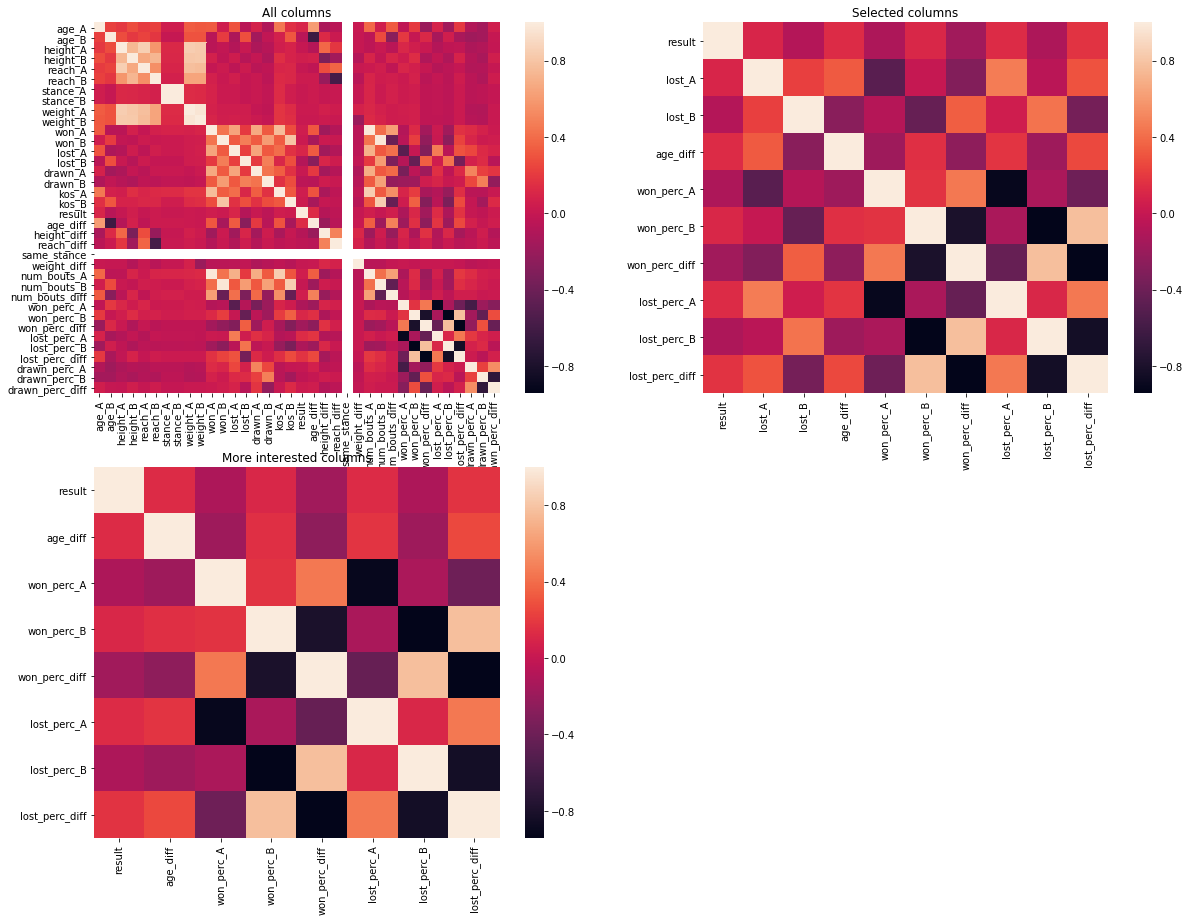

In [56]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.heatmap(df.corr())
plt.title('All columns')

important_feats = (abs(df.corr()['result']) > .08)
# print('All columns:\n', important_feats, '\n')

plt.subplot(2, 2, 2)
plt.title('Selected columns')
interested_cols = ['lost_A', 'lost_B', 'age_diff', 'won_perc_A', 'won_perc_B', 'won_perc_diff', 'lost_perc_A', 'lost_perc_B', 'lost_perc_diff']
sns.heatmap(df[['result'] + interested_cols].corr())
# print('Subset #1\n:', df[['result'] + interested_cols].corr()['result'], '\n')

plt.subplot(2, 2, 3)
plt.title('More interested columns')
more_interested_cols = ['age_diff', 'won_perc_A', 'won_perc_B', 'won_perc_diff', 'lost_perc_A', 'lost_perc_B', 'lost_perc_diff']
sns.heatmap(df[['result'] + more_interested_cols].corr())
print('More interested cols:\n', df[['result'] + more_interested_cols].corr()['result'])

plt.show()

In [50]:
X = df[more_interested_cols]
Y = df['result']

Y.value_counts()/len(Y)

1    0.817902
2    0.139746
0    0.042351
Name: result, dtype: float64

In [51]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X, Y)

cross_val_score(mlp, X, Y, cv=5)

array([0.82855237, 0.82242991, 0.81283422, 0.81885027, 0.8302139 ])